## Extração de características
### Invertendo imagens

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Vetor com o nome de todos os arquivos que terminam com '.jpg'
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)

['/app/aula8/Beach1.jpg', '/app/aula8/Beach1_inv.jpg', '/app/aula8/Beach2.jpg', '/app/aula8/Beach2_inv.jpg', '/app/aula8/Beach3.jpg', '/app/aula8/Beach3_inv.jpg', '/app/aula8/Buildings1.jpg', '/app/aula8/Buildings1_inv.jpg', '/app/aula8/Buildings2.jpg', '/app/aula8/Buildings2_inv.jpg', '/app/aula8/Buildings3.jpg', '/app/aula8/Buildings3_inv.jpg', '/app/aula8/Buses10.jpg', '/app/aula8/Buses10_inv.jpg', '/app/aula8/Buses3.jpg', '/app/aula8/Buses3_inv.jpg', '/app/aula8/Buses9.jpg', '/app/aula8/Buses9_inv.jpg', '/app/aula8/Flowers1.jpg', '/app/aula8/Flowers1_inv.jpg', '/app/aula8/Flowers2.jpg', '/app/aula8/Flowers2_inv.jpg', '/app/aula8/Flowers4.jpg', '/app/aula8/Flowers4_inv.jpg', '/app/aula8/Horses14.jpg', '/app/aula8/Horses14_inv.jpg', '/app/aula8/Horses15.jpg', '/app/aula8/Horses15_inv.jpg', '/app/aula8/Horses16.jpg', '/app/aula8/Horses16_inv.jpg', '/app/aula8/Mountains52.jpg', '/app/aula8/Mountains52_inv.jpg', '/app/aula8/Mountains53.jpg', '/app/aula8/Mountains53_inv.jpg', '/app/aula8

In [11]:
diretorio, arquivo = path, filename = os.path.split(files_path[0])
print(arquivo)

Beach1.jpg


In [3]:
# Salva novas imagens invertidas com o nome adicionado com '_inv'
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    print(arquivo)
    imagem = cv2.imread(arquivo)
    a = arquivo.split('.')
    imagemEspelhada = imagem[::-1,:,:]
    cv2.imwrite(a[0]+'_inv.jpg', imagemEspelhada)
             
# plt.imshow(imagem)
# plt.show()
# plt.imshow(imagemInvertida)


Beach1.jpg
Beach2.jpg
Beach3.jpg
Buildings1.jpg
Buildings2.jpg
Buildings3.jpg
Buses10.jpg
Buses3.jpg
Buses9.jpg
Flowers1.jpg
Flowers2.jpg
Flowers4.jpg
Horses14.jpg
Horses15.jpg
Horses16.jpg
Mountains52.jpg
Mountains53.jpg
Mountains54.jpg


### Analise de similaridade pelo histograma dos pixels

In [13]:
def histograma(img):
    WB = np.zeros(256)
    WG = np.zeros(256)
    WR = np.zeros(256)
    qntLinhas, qntColunas, c = img.shape
    B = img[:,:,0]
    G = img[:,:,0]
    R = img[:,:,0]
    
    # Cria histograma dos valores dos pixels
    for i in range(qntLinhas):
        for j in range(qntColunas):
            WB[B[i,j]] = WB[B[i,j]] + 1
            WG[G[i,j]] = WG[G[i,j]] + 1
            WR[R[i,j]] = WR[R[i,j]] + 1
    
    # Normaliza os valores do histograma
    for i in range(256):
        WB[i] = WB[i]/(qntLinhas*qntColunas)
        WG[i] = WG[i]/(qntLinhas*qntColunas)
        WR[i] = WR[i]/(qntLinhas*qntColunas)
    
    return np.append(np.append(WB,WG),WR)

# Calcula a distância euclidiana
def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
        
    return np.sqrt(soma)

In [14]:
# Imagem de consulta
img = cv2.imread('Beach1.jpg')
hist_consulta = histograma(img)
d = []

# Define o histograma de cada imagem
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    imagem = cv2.imread(arquivo)
    
    hist = histograma(imagem)
    d.append((distancia(hist_consulta, hist), arquivo))
    
print(sorted(d))

[(0.0, 'Beach1.jpg'), (0.0066467630778366685, 'Beach1_inv.jpg'), (0.052629313186842455, 'Buses9.jpg'), (0.053402459905373144, 'Buses9_inv.jpg'), (0.06709420320949752, 'Buses10.jpg'), (0.06720277442595309, 'Buses10_inv.jpg'), (0.08984265464999569, 'Mountains52_inv.jpg'), (0.08988603688645457, 'Mountains52.jpg'), (0.10403279603218239, 'Buses3_inv.jpg'), (0.10567248352584788, 'Buses3.jpg'), (0.11382261083106897, 'Buildings1_inv.jpg'), (0.11768405668884073, 'Buildings1.jpg'), (0.12721468805546896, 'Flowers2.jpg'), (0.12722515891322522, 'Flowers2_inv.jpg'), (0.13082549145177563, 'Buildings2_inv.jpg'), (0.1312690083423734, 'Buildings2.jpg'), (0.1394851837386878, 'Buildings3_inv.jpg'), (0.13950637224670928, 'Buildings3.jpg'), (0.15296019237312186, 'Horses14_inv.jpg'), (0.15380827081232615, 'Horses14.jpg'), (0.15673112704387843, 'Horses15_inv.jpg'), (0.15680401850572478, 'Horses15.jpg'), (0.16318518080244945, 'Mountains53_inv.jpg'), (0.16358335858521503, 'Mountains53.jpg'), (0.1740588753264070

### Encontrando textura da imagem

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Faz a convolução para encontrar a textura da imagem
def lbp(img):
    qntLinhas, qntColunas = img.shape
    img2 = np.zeros((qntLinhas,qntColunas), dtype=int)
    
    for i in range(1, qntLinhas-1):
        for j in range(1, qntColunas-1):
            A = img[i-1, j]
            B = img[i-1, j+1]
            C = img[i, j+1]
            D = img[i+1, j+1]
            E = img[i+1, j]
            F = img[i+1, j-1]
            G = img[i, j-1]
            H = img[i-1, j-1]
            
            Centro = img[i,j]
            soma = 0
            
            # Transforma o binário em decimal na variavel 'soma'
            if(A > Centro):
                soma = soma + (2**7)
            if(B > Centro):
                soma = soma + (2**6)
            if(C > Centro):
                soma = soma + (2**5)
            if(D > Centro):
                soma = soma + (2**4)
            if(E > Centro):
                soma = soma + (2**3)
            if(F > Centro):
                soma = soma + (2**2)
            if(G > Centro):
                soma = soma + (2**1)
            if(H > Centro):
                soma = soma + (2**0)
                
            img2[i,j] = soma
            
    return img2

def histograma_cinza(img):
    W = np.zeros(256)
    qntLinhas, qntColunas = img.shape
    
    # Cria histograma dos valores dos pixels
    for i in range(qntLinhas):
        for j in range(qntColunas):
            W[img[i,j]] = W[img[i,j]] + 1
    
    # Normaliza os valores do histograma
    for i in range(256):
        W[i] = W[i]/(qntLinhas*qntColunas)
    
    return W

[(0.1832950018010747, 'Buses3.jpg'), (0.1910186782719443, 'Buses3_inv.jpg'), (0.19110597901798537, 'Buses9.jpg'), (0.1933258243742044, 'Buildings2.jpg'), (0.1953285984186521, 'Buses9_inv.jpg'), (0.19598981030667573, 'Buildings2_inv.jpg'), (0.19849395320229107, 'Buildings1.jpg'), (0.2001557742723738, 'Buses10.jpg'), (0.20094662826367904, 'Mountains52.jpg'), (0.2009957786594413, 'Mountains52_inv.jpg'), (0.201288432805407, 'Buses10_inv.jpg'), (0.20255726095196444, 'Buildings1_inv.jpg'), (0.20291939797952316, 'Beach1.jpg'), (0.2031310984315527, 'Horses14.jpg'), (0.20440033719469602, 'Beach1_inv.jpg'), (0.20460106093864314, 'Horses14_inv.jpg'), (0.20901294415924, 'Buildings3.jpg'), (0.209707909048955, 'Mountains53_inv.jpg'), (0.20975996300277838, 'Mountains53.jpg'), (0.21057084088116587, 'Buildings3_inv.jpg'), (0.2106395140370533, 'Horses15.jpg'), (0.21064921191977082, 'Horses15_inv.jpg'), (0.2125133813668345, 'Horses16_inv.jpg'), (0.21253545300184748, 'Horses16.jpg'), (0.21350597600873578,

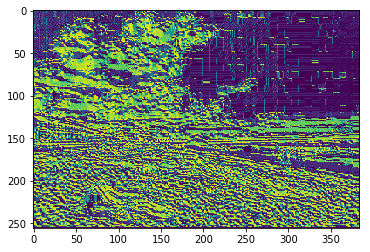

In [31]:
img = cv2.imread('Beach3.jpg',0)
img2 = lbp(img) # Encontra textura da imagem
d = []

# Mostra textura da imagem
plt.imshow(img2)

# Calcula o histograma da textura
hist_consulta = histograma_cinza(img2)

# Define o histograma da textura de cada imagem
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    imagem = cv2.imread(arquivo, 0)
    
    hist = histograma_cinza(imagem)
    d.append((distancia(hist_consulta, hist), arquivo))

# Mostra a similaridade por textura
print(sorted(d))

## Código que já veio na aula sem explicação...

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread('lena.png', 0)

qtdeLinhas, qtdeColunas = imagemOriginal.shape

imagemModificada = np.zeros((qtdeColunas, qtdeLinhas))

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        imagemModificada[j,i] = imagemOriginal[i,j]
                

plt.gray()               
plt.imshow(imagemOriginal)
plt.show()          
plt.imshow(imagemModificada)

AttributeError: 'NoneType' object has no attribute 'shape'